In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import time
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

<h1>First we will be loading the Training and test data which are kddcup.data_10_percent.gz and kddcup.newtestdata_10_percent_unlabeled.gz</h1>

In [2]:
train= pd.read_csv('/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz', compression='gzip', header=0, sep=',', quotechar='"')
train.to_csv('./train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   0        494020 non-null  int64  
 1   tcp      494020 non-null  object 
 2   http     494020 non-null  object 
 3   SF       494020 non-null  object 
 4   181      494020 non-null  int64  
 5   5450     494020 non-null  int64  
 6   0.1      494020 non-null  int64  
 7   0.2      494020 non-null  int64  
 8   0.3      494020 non-null  int64  
 9   0.4      494020 non-null  int64  
 10  0.5      494020 non-null  int64  
 11  1        494020 non-null  int64  
 12  0.6      494020 non-null  int64  
 13  0.7      494020 non-null  int64  
 14  0.8      494020 non-null  int64  
 15  0.9      494020 non-null  int64  
 16  0.10     494020 non-null  int64  
 17  0.11     494020 non-null  int64  
 18  0.12     494020 non-null  int64  
 19  0.13     494020 non-null  int64  
 20  0.14     494020 non-null  

## data preprossing

<h3>We will rename name the coulmns name using the names that were provided here Plus adding the Lables coulmn <h3> http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names

In [4]:
culmn_name=['index','duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
            'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
            'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','lable']

In [5]:
len(culmn_name)

43

In [6]:
df = pd.read_csv('./train.csv', header=None, names=culmn_name, low_memory=False)
#test = pd.read_csv('./Test.csv', header=None, names=culmn_name, low_memory=False)

In [7]:
df =df .dropna()
df =df .drop(['index'], axis=1)
# test=test.dropna()
# test=test.drop(['index'], axis=1)

In [8]:
df ['lable'].value_counts()

smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: lable, dtype: int64

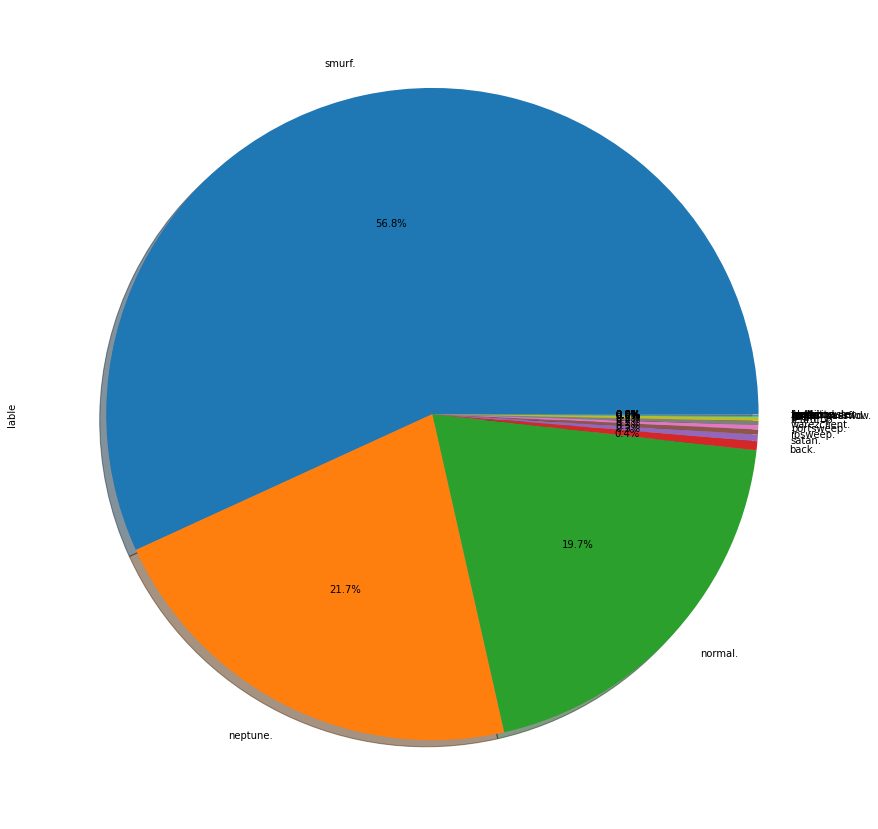

In [9]:
df ['lable'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(20,15))
plt.show()

In [10]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,0.001008,0.0,0.0,0.001387,332.286347,292.907133,0.176687,0.791547,232.471230,188.666034
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,0.036482,0.0,0.0,0.037211,213.147129,246.322733,0.380717,0.388190,64.744665,106.040236
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,1.000000,255.000000,46.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,1.000000,255.000000,255.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,1.000000,255.000000,255.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,255.000000,255.000000


In [11]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,lable
1,0,tcp,http,SF,239,486,0.0,0.0,0.0,0.0,...,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0.0,0.0,0.0,0.0,...,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0.0,0.0,0.0,0.0,...,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0.0,0.0,0.0,0.0,...,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0.0,0.0,0.0,0.0,...,59.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


<h1>Using the column name from this link : </h1> <a>http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types </a></br>
we turned the lables to be one of 5 values normal,DOS,R2L,U2R and probing. 
and this is prefe intro for the types:</br>
normal: normal traffic without malware </br>
DOS: denial-of-service, e.g. syn flood;</br>
R2L: unauthorized access from a remote machine, e.g. guessing password;</br>
U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;</br>
probing: surveillance and other probing, e.g., port scanning.
Source <a>http://kdd.ics.uci.edu/databases/kddcup99/task.html</a>

In [12]:
"""
dos:back ,land,neptune,pod,smurf,teardrop
u2r:buffer_overflow ,loadmodule,perl,rootkit 
r2l:ftp_write ,guess_passwd,imap,multihop,phf,spy,warezclient,warezmaster
probe:ipsweep ,nmap,portsweep,satan 
"""


df ['lable'] = df ['lable'].replace(['normal.'], '0') 
df ['lable'] = df ['lable'].replace(['back.' ,'land.','neptune.','pod.','smurf.','teardrop.','buffer_overflow.' ,'loadmodule.','perl.','rootkit.', 'ftp_write.' ,
                                         'guess_passwd.','imap.','multihop.','phf.','spy.','warezclient.','warezmaster.','ipsweep.' ,'nmap.','portsweep.','satan.'], '1') 

# train['lable'] = train['lable'].replace(['normal.'], '0') 
# train['lable'] = train['lable'].replace(['back.' ,'land.','neptune.','pod.','smurf.','teardrop.'], '1') 
# train['lable'] = train['lable'].replace(['buffer_overflow.' ,'loadmodule.','perl.','rootkit.'], '2') 
# train['lable'] = train['lable'].replace(['ftp_write.' ,'guess_passwd.','imap.','multihop.','phf.','spy.','warezclient.','warezmaster.'], '3') 
# train['lable'] = train['lable'].replace(['ipsweep.' ,'nmap.','portsweep.','satan.' ], '4') 

# test['lable'] = test['lable'].replace(['normal.'], '0') 
# test['lable'] = test['lable'].replace(['back.' ,'land.','neptune.','pod.','smurf.','teardrop.'], '1') 
# test['lable'] = test['lable'].replace(['buffer_overflow.' ,'loadmodule.','perl.','rootkit.'], '2') 
# test['lable'] = test['lable'].replace(['ftp_write.' ,'guess_passwd.','imap.','multihop.','phf.','spy.','warezclient.','warezmaster.'], '3') 
# test['lable'] = test['lable'].replace(['ipsweep.' ,'nmap.','portsweep.','satan.' ], '4') 


In [13]:
df ['lable'].value_counts()

1    396743
0     97277
Name: lable, dtype: int64

<AxesSubplot:>

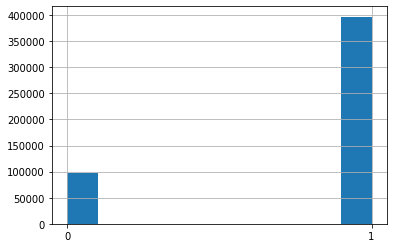

In [14]:
df['lable'].hist()

In [15]:
# extract numerical attributes and scale it to have zero mean and unit variance  
numname = df.select_dtypes(include=['float64','int64']).columns
num=df[numname]

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# extract categorical attributes from both training and test sets 
cat = df.select_dtypes(include=['object']).copy()
# encode the categorical attributes
traincat = cat.apply(encoder.fit_transform)
# separate target column from encoded data 
enctrain = traincat.drop(['lable'], axis=1)

In [17]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                        int64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                            int64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

In [18]:
#Finding categorical features
num_cols = traincat._get_numeric_data().columns
cat_V = list(set(df.columns)-set(num_cols))
# cat_V.remove('lable')
cat_V

['num_root',
 'count',
 'dst_host_count',
 'duration',
 'srv_count',
 'num_outbound_cmds',
 'serror_rate',
 'urgent',
 'is_host_login',
 'hot',
 'dst_bytes',
 'src_bytes',
 'num_failed_logins',
 'is_guest_login',
 'same_srv_rate',
 'land',
 'wrong_fragment',
 'root_shell',
 'logged_in',
 'num_access_files',
 'dst_host_srv_count',
 'num_file_creations',
 'num_shells',
 'num_compromised',
 'su_attempted']

In [19]:
num_cols

Index(['protocol_type', 'service', 'flag', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'lable'],
      dtype='object')

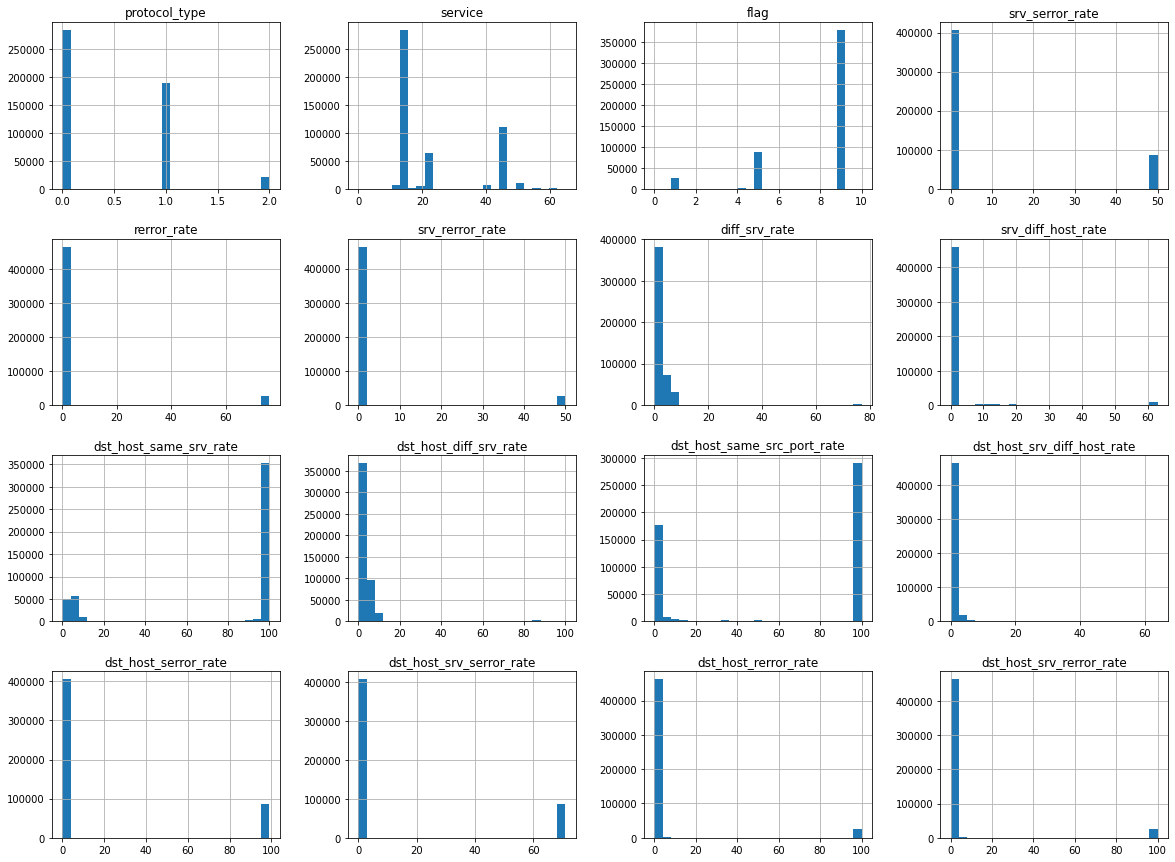

In [20]:
enctrain.hist(bins=25, figsize=(20,15))
plt.show()

In [21]:
final_train=pd.concat([num,enctrain],axis=1)
y_train = df['lable']
final_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
1,0,239,486,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,100,0,5,0,0,0,0,0
2,0,235,1337,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,100,0,3,0,0,0,0,0
3,0,219,1337,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,100,0,3,0,0,0,0,0
4,0,217,2032,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,100,0,2,0,0,0,0,0
5,0,217,2032,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,100,0,2,0,0,0,0,0


# corr matrix for num varibals 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



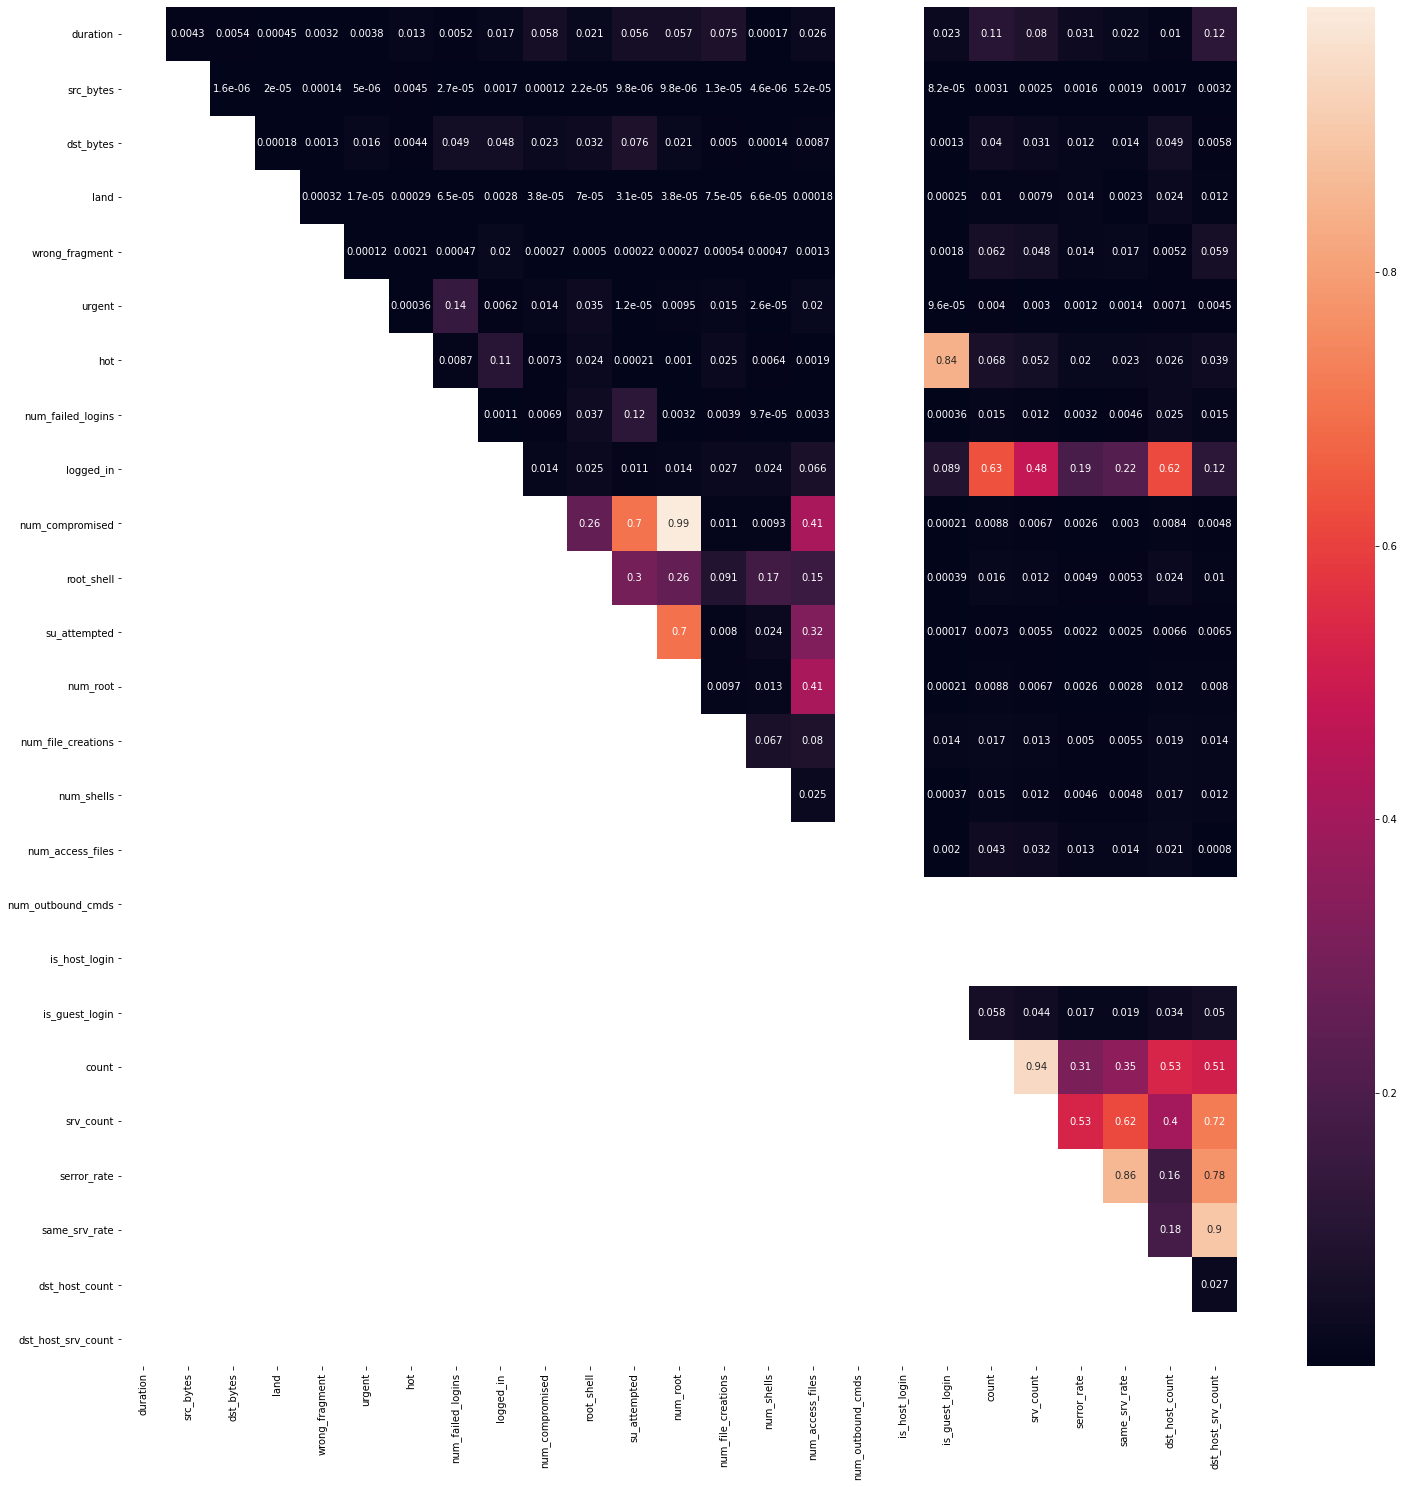

In [22]:
upper_tri = final_train[numname].corr().abs()
upper_tri=upper_tri.where(np.triu(np.ones(upper_tri.shape),k=1).astype(np.bool))
fig, ax = plt.subplots(figsize=(25,25))
ax=sns.heatmap(upper_tri, annot=True)

# fueter eng 

In [23]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_jobs=-1,random_state=42)
rnd_clf.fit(final_train, y_train)
x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, final_train.columns), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 600, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [24]:
def evalution(model,X_train, X_test, Y_train, Y_test ):
    print("Training Accuracy :\t ",model.score(X_train, Y_train))
    print("Testing Accuracy :\t  ",  model.score(X_test, Y_test))
    y_pred = model.predict(X_test)
    r=recall_score( Y_test,y_pred)
    print("recall Accuracy :\t  ", r )
    print('Confusion matrix:\n ', confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    return r

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(final_train, y_train, test_size=0.33, random_state=42)

In [26]:
s=[]
for name, importance in zip(final_train.columns, rnd_clf.feature_importances_):
    if importance > 0.030 :
      s.append(name)
      print('"' + name + '"'+',')

"src_bytes",
"dst_bytes",
"logged_in",
"count",
"srv_count",
"same_srv_rate",
"dst_host_count",
"protocol_type",
"dst_host_srv_diff_host_rate",


In [27]:
final_train2=final_train.loc[:,s]

In [28]:
final_train2

,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,dst_host_count,protocol_type,dst_host_srv_diff_host_rate
1,239,486,1,8,8.0,1.0,19,1,0
2,235,1337,1,8,8.0,1.0,29,1,0
3,219,1337,1,6,6.0,1.0,39,1,0
4,217,2032,1,6,6.0,1.0,49,1,0
5,217,2032,1,6,6.0,1.0,59,1,0
...,...,...,...,...,...,...,...,...,...
494016,310,1881,1,4,5.0,1.0,86,1,5
494017,282,2286,1,6,6.0,1.0,6,1,5
494018,203,1200,1,6,18.0,1.0,16,1,5
494019,291,1200,1,6,12.0,1.0,26,1,5


In [29]:
def predect(model,X_train, y_train,X_test, y_test):
    model.fit(X_train, y_train)

    #Scoring the model on train data
    print("Training Accuracy :\t ", model.score(X_train, y_train))

    #Scoring the model on test_data
    print("Testing Accuracy :\t  ",  model.score(X_test, y_test))

    y_pred = model.predict(X_test)
    scc=accuracy_score(y_test, y_pred)
    print(scc)
    #print('ROC-AUC score', roc_auc_score(y_test,y_pred))
    print('classification report:\n ',classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)

    sns.heatmap(conf_matrix, annot=True, fmt="3g")
    plt.show()
    return y_pred,scc

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc, roc_auc_score,classification_report

In [31]:
dt_model =  DecisionTreeClassifier()
rf_model = RandomForestClassifier( n_jobs=-1)
ada_boost_model = AdaBoostClassifier()
bagging_model = BaggingClassifier()
extra_trees_model = ExtraTreesClassifier()
ensemble_clf=[ dt_model, rf_model, ada_boost_model, 
       bagging_model,extra_trees_model,]

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.9996380967569789
0.9996380967569789
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    130872

    accuracy                           1.00    163027
   macro avg       1.00      1.00      1.00    163027
weighted avg       1.00      1.00      1.00    163027



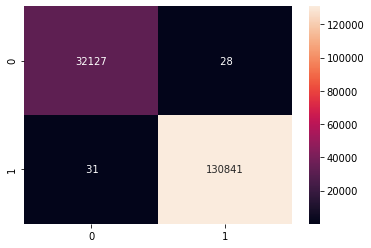

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.9998098474485821
0.9998098474485821
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    130872

    accuracy                           1.00    163027
   macro avg       1.00      1.00      1.00    163027
weighted avg       1.00      1.00      1.00    163027



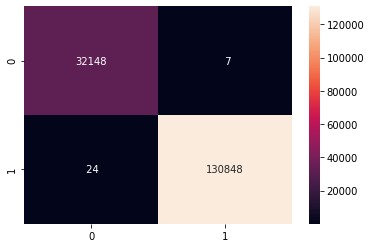

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.9986374334200421
Testing Accuracy :	   0.9983376986634116
0.9983376986634116
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    130872

    accuracy                           1.00    163027
   macro avg       1.00      1.00      1.00    163027
weighted avg       1.00      1.00      1.00    163027



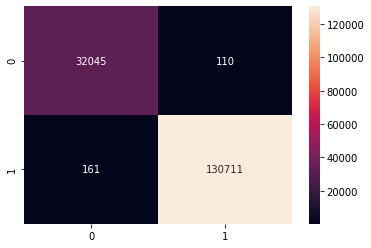

#############################BaggingClassifier#############################
Training Accuracy :	  0.9999818727284263
Testing Accuracy :	   0.9997239721027805
0.9997239721027805
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    130872

    accuracy                           1.00    163027
   macro avg       1.00      1.00      1.00    163027
weighted avg       1.00      1.00      1.00    163027



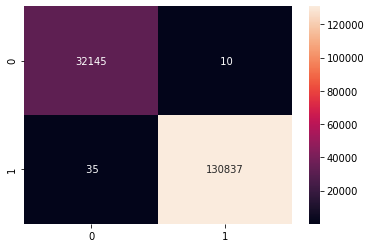

#############################ExtraTreesClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.9997791776822245
0.9997791776822245
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    130872

    accuracy                           1.00    163027
   macro avg       1.00      1.00      1.00    163027
weighted avg       1.00      1.00      1.00    163027



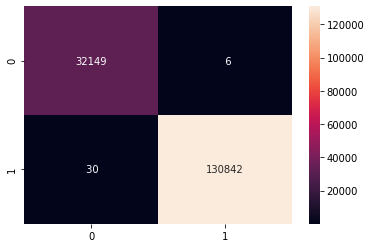

In [42]:
for i in range(len(ensemble_clf)):

        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        ypred,acc=predect(ensemble_clf[i],X_train, Y_train,X_test, Y_test)

# Here we will be implimanting the Gan algorithm 

In [32]:
!pip install ctgan

In [33]:
!pip install table_evaluator

In [42]:
from sklearn.utils import shuffle
final_train, y_train = shuffle(final_train, y_train, random_state=42)

In [43]:
y_train.unique()

array(['1', '0'], dtype=object)

In [44]:
full_data = pd.concat([pd.DataFrame(final_train), pd.DataFrame(y_train)],axis=1 , ignore_index = True).astype(float)
full_data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
362273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,6.0,0.0,0.0,99.0,71.0,0.0,0.0,1.0
294450,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0
312181,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0
270898,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0
253975,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
full_data[41].unique()

array([1., 0.])

In [46]:
full_data = full_data.reset_index(drop=True)
full_data.head()
normal_attacks = full_data[full_data[41]==0]
normal_attacks = normal_attacks.reset_index(drop=True)
normal_attacks.head()
len(normal_attacks)
normal_attacks_x = normal_attacks.iloc[:,0:41]
normal_attacks_y = normal_attacks.iloc[:,41]

In [47]:
normal_attacks_y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 41, dtype: float64

In [48]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(normal_attacks_x.iloc[0:30000].to_numpy().astype(float), normal_attacks_y.iloc[0:30000].to_numpy().astype(int), epochs = 50)

Epoch 1, Loss G:  5.0623,Loss D:  0.0699
Epoch 2, Loss G:  5.1829,Loss D:  0.3639
Epoch 3, Loss G:  5.8683,Loss D:  0.4319
Epoch 4, Loss G:  5.8652,Loss D: -0.1636
Epoch 5, Loss G:  4.7148,Loss D: -0.2000
Epoch 6, Loss G:  3.8020,Loss D:  0.5132
Epoch 7, Loss G:  3.2152,Loss D: -0.0097
Epoch 8, Loss G:  1.8915,Loss D: -0.1276
Epoch 9, Loss G:  0.4484,Loss D:  0.0444
Epoch 10, Loss G: -0.6567,Loss D: -0.0957
Epoch 11, Loss G: -1.3832,Loss D: -0.1303
Epoch 12, Loss G: -1.1707,Loss D: -0.3060
Epoch 13, Loss G: -0.9986,Loss D:  0.0031
Epoch 14, Loss G: -0.3653,Loss D: -0.2777
Epoch 15, Loss G: -0.9481,Loss D: -0.0276
Epoch 16, Loss G: -0.4532,Loss D:  0.0574
Epoch 17, Loss G: -0.7867,Loss D:  0.2305
Epoch 18, Loss G: -0.1281,Loss D:  0.2250
Epoch 19, Loss G:  0.4097,Loss D: -0.3137
Epoch 20, Loss G:  0.4862,Loss D:  0.3063
Epoch 21, Loss G: -0.0516,Loss D:  0.4520
Epoch 22, Loss G: -0.1553,Loss D:  0.0746
Epoch 23, Loss G: -1.2042,Loss D:  0.1045
Epoch 24, Loss G: -0.9316,Loss D:  0.1533
E

In [49]:
ctgan.save("my_model.pkl")

In [50]:
normal_attacks_x.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,228.0,3432.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,212.0,1187.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,100.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0
2,0.0,228.0,2100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,100.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0
3,0.0,229.0,392.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,18.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1349.0,340.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,69.0,14.0,3.0,6.0,0.0,0.0,0.0,0.0


In [73]:
normal_attacks_y = pd.DataFrame(normal_attacks_y).reset_index(drop=True)
normal_attacks_y = normal_attacks_y.T.reset_index(drop=True).T
normal_attacks_y.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [76]:
from ctgan import CTGAN
loaded = CTGAN.load("/kaggle/working/my_model.pkl")
samples = loaded.sample(len(normal_attacks_x))
pd.DataFrame(samples).head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2351.0,-704.227204,498.360409,0.000908,0.002573,0.002020,-0.000035,0.002249,1.002171,0.007444,...,-0.200544,0.317853,10.102296,80.337427,15.530012,0.210533,-0.001070,0.002446,-0.137679,0.395141
1,1349.0,-495.957322,816.616742,0.000512,0.000313,0.000443,-0.007069,-0.000561,1.003560,-0.028272,...,51.415006,61.333989,-4.633704,49.364477,3.482352,-0.711248,-0.009979,-0.018850,-0.069456,0.305444
2,4029.0,-478.360898,-1031.424968,-0.000841,-0.000112,0.002394,-0.005084,0.001488,0.032432,-0.024047,...,-0.049214,-0.521528,3.244414,10.645650,2.437292,1.141143,-0.030444,1.915425,-0.332194,-0.384289
3,1029.0,-351.513231,-86.099351,0.002735,-0.000480,-0.002148,-0.015976,0.000229,-0.000335,0.008211,...,-0.194128,0.412621,1.045613,33.105946,0.939887,-0.625301,0.001551,-0.000390,0.291519,0.334921
4,17833.0,-429.787266,1009.220871,0.001747,-0.000968,0.001588,0.002581,-0.003296,0.991837,-0.023911,...,31.604890,0.269576,1.323791,0.181812,20.120330,0.661411,1.090943,0.012526,0.045569,0.116210


In [78]:
rf_model = RandomForestClassifier( n_jobs=-1)
rf_model.fit(final_train, y_train)

RandomForestClassifier(n_jobs=-1)

Training Accuracy :	  0.9999979757904538


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Testing Accuracy :	   0.3621925018246862


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



0.3621925018246862
classification report:
                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.36      0.53     97277

    accuracy                           0.36     97277
   macro avg       0.50      0.18      0.27     97277
weighted avg       1.00      0.36      0.53     97277



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



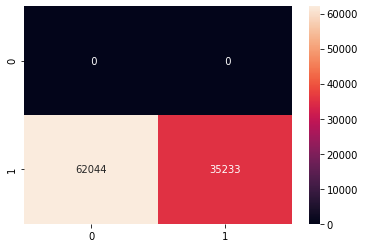

(array([0, 0, 1, ..., 0, 0, 0]), 0.3621925018246862)

In [85]:
y_malicious = np.ones(len(normal_attacks_y))
predect(rf_model,final_train, y_train.astype(int),samples, y_malicious.astype(int))